In [98]:
import os
import pandas as pd
import io
import numpy as np
import plotnine
from plotnine import *
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [99]:
df = pd.read_csv('/Users/nicomontenegrob/Documents/NYU/Data Bootcamp/Clean_df.csv')

In [100]:
df

wage = 'Yearly brutto salary (without bonus and stocks) in EUR'

In [101]:
columns = df.columns.tolist()

numcolumns = ['Age','Total years of experience', 'Years of experience in Germany',
            'Yearly brutto salary (without bonus and stocks) in EUR',
            'Yearly bonus + stocks in EUR', 'Number of vacation days',
            'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
            'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

txtcolumns = ['Gender', 'City', 'Position', 'Seniority level',
               'Your main technology / programming language',
               'Employment status', 'Main language at work',
               'Company size', 
               'Have you lost your job due to the coronavirus outbreak?']

In [102]:
dictionary1 = {}

for col in columns:
    avg = df.groupby(col)['Yearly brutto salary (without bonus and stocks) in EUR'].mean().to_frame()
    sd = df.groupby(col)['Yearly brutto salary (without bonus and stocks) in EUR'].std().to_frame()
    n = df[col].value_counts()
    statdf = pd.concat([avg,sd,n], axis=1)
    statdf = statdf.reset_index()
    statdf.columns = [col,'Mean', 'Standard Deviation', 'Sample Size']
    dictionary1[col] = statdf
    dictionary1[col]
    
def getindex(colname, value):
    return pd.Index(df[colname]).get_loc(value)
    
def indivcleaner(colname,lookup,replacement):
    df.iloc[getindex(colname, lookup)] = df.iloc[getindex(colname, lookup)].replace(lookup, replacement)

In [122]:
def wagebox(colname):
    print(ggplot(df, aes(x=colname, y = wage)) + geom_boxplot() + ylab('Yearly Salary'))
    
def wageplot(colname):
    print(ggplot(df, aes(x=colname, y = wage)) + geom_point() + ylab('Yearly Salary'))
    
pd.set_option('display.max_rows', None)

In [105]:
dictionary1['Gender']

,Gender,Mean,Standard Deviation,Sample Size
0,Diverse,144500,20506,2
1,Female,3346855,40550673,152
2,Male,74260,35869,902


In [104]:
# Analysis

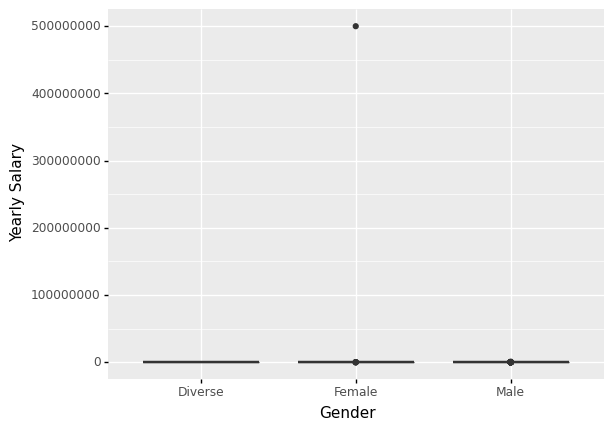

In [106]:
wagebox('Gender')

In [107]:
# Clearly there are outliers that need to be replaced

wagemedian = df[wage].median()

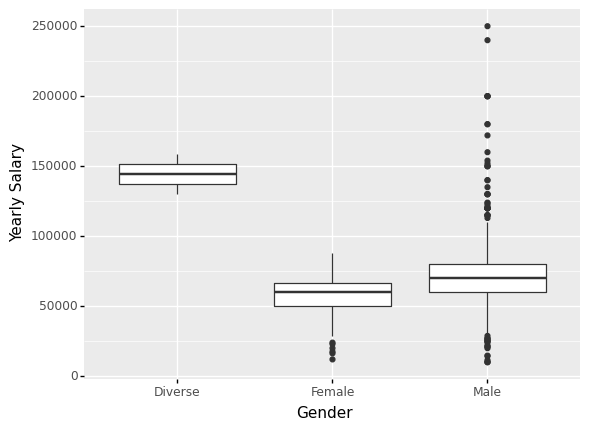

In [108]:
# Analysis

indivcleaner(wage, 500000000, wagemedian)

indivcleaner(wage, 850000, wagemedian)

indivcleaner(wage, 300000, wagemedian)

wagebox('Gender')

In [ ]:
# Analysis

In [74]:
dictionary1['Age']

,Gender,Mean,Standard Deviation,Sample Size
0,Diverse,144500,20506,2
1,Female,3346855,40550673,152
2,Male,74260,35869,902


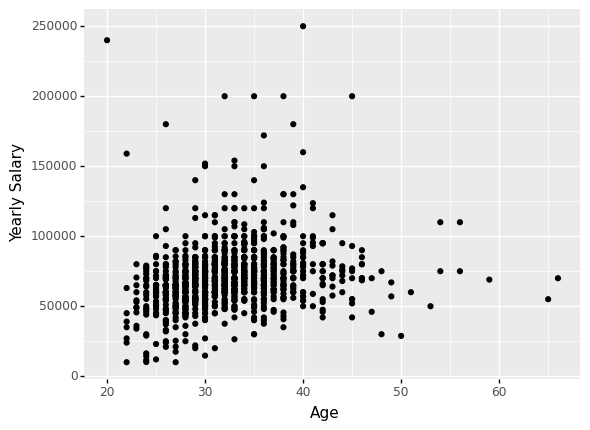

In [110]:
wageplot('Age')

In [ ]:
# Analysis

In [113]:
dictionary1['City']

,City,Mean,Standard Deviation,Sample Size
0,Aachen,40082,42310,2
1,Amsterdam,77142,18682,6
2,Ansbach,42000,NaN,1
3,Barcelona,31000,12728,2
4,Berlin,74401,38966,577
5,Bielefeld,55000,NaN,1
6,Bodensee,81000,NaN,1
7,Boeblingen,57000,11533,3
8,Bonn,54233,1504,3
9,Braunschweig,75000,NaN,1


In [ ]:
# Analysis

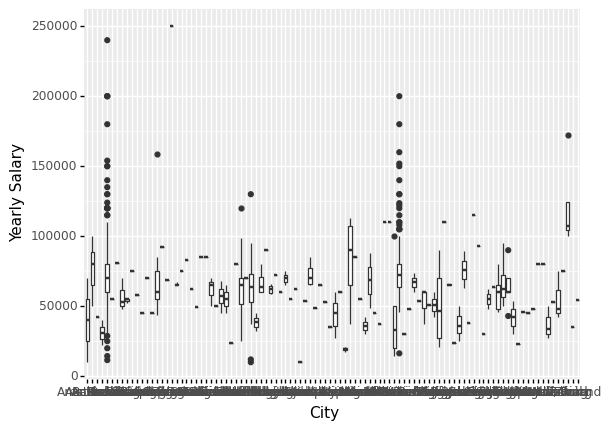

In [123]:
wagebox('City')

In [ ]:
# Analysis

In [125]:
dictionary1['Total years of experience']

,Total years of experience,Mean,Standard Deviation,Sample Size
0,0,38915,17123,8
1,1,29750,25809,2
2,1,19290881,98045824,26
3,2,50962,5044,4
4,2,52046,12822,48
5,2,48000,17889,5
6,3,53637,18590,56
7,4,62500,10607,2
8,4,58034,14665,69
9,4,67500,10607,2


In [ ]:
# Analysis

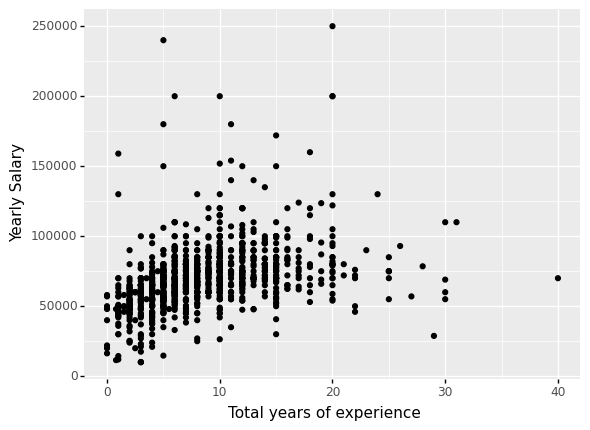

In [126]:
wageplot('Total years of experience')

In [ ]:
# Analysis

In [127]:
dictionary1['Years of experience in Germany']

,Years of experience in Germany,Mean,Standard Deviation,Sample Size
0,0,56566,31522,92
1,0.1,85000,NaN,1
2,0.2,11500,NaN,1
3,0.25,52800,25910,3
4,0.3,32000,NaN,1
5,0.4,57000,NaN,1
6,0.5,66647,20517,15
7,0.8,48000,NaN,1
8,0.9,55000,NaN,1
9,1,3058474,38686152,167


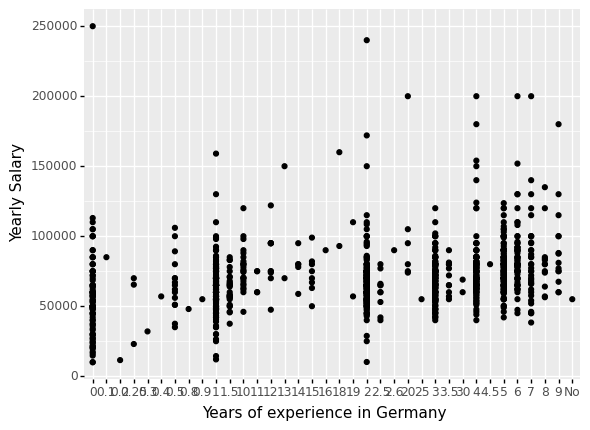

In [128]:
wageplot('Years of experience in Germany')

In [ ]:
# Analysis

In [129]:
dictionary1['Seniority level']

,Seniority level,Mean,Standard Deviation,Sample Size
0,C-Level Executive,155000,42720,3
1,Director,100000,NaN,1
2,Entry level,54179,NaN,1
3,Head,101919,31688,31
4,Intern,20350,10326,4
5,Junior,51398,32890,69
6,Lead,88622,26887,143
7,Manager,89200,NaN,1
8,Middle,1666519,28349057,311
9,No level,47500,NaN,1


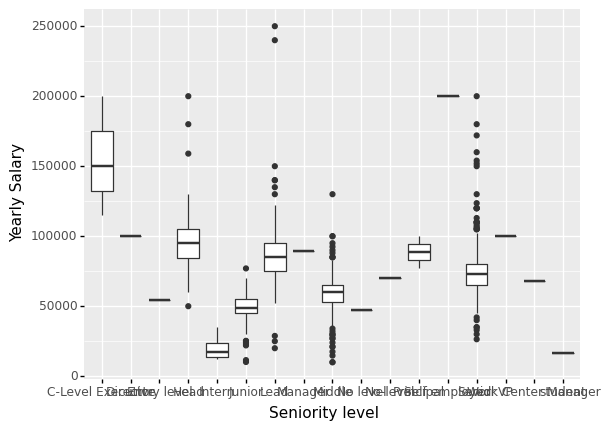

In [130]:
wagebox('Seniority level')

In [ ]:
# Anlysis

In [132]:
dictionary1['Your main technology / programming language']

In [ ]:
# Analysis

In [ ]:
wagebox('Your main technology / programming language')

In [ ]:
# Analysis

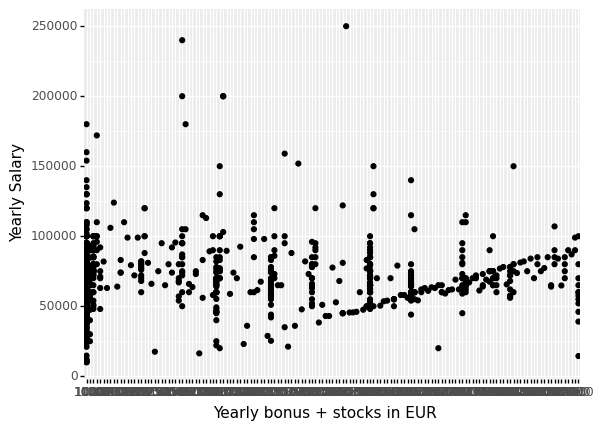

In [133]:
wageplot('Yearly bonus + stocks in EUR')

In [135]:
dictionary1['Number of vacation days']

,Number of vacation days,Mean,Standard Deviation,Sample Size
0,0,75852,51730,36
1,1,25000,NaN,1
2,3,76500,NaN,1
3,5,140000,NaN,1
4,10,16320,NaN,1
5,12,30500,26163,2
6,14,84388,101460,3
7,15,110000,70711,2
8,16,37500,NaN,1
9,20,54250,26746,8


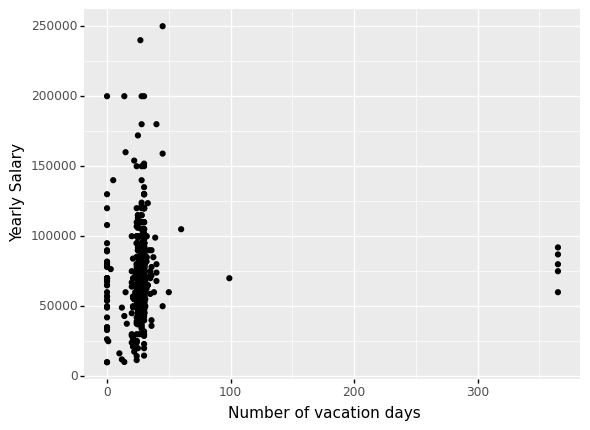

In [136]:
wageplot('Number of vacation days')

In [137]:
dictionary1['Main language at work']

,Main language at work,Mean,Standard Deviation,Sample Size
0,Bilingual,72000,31488,5
1,Czech,21120,NaN,1
2,English,645557,16910301,874
3,French,80000,NaN,1
4,German,66959,25754,159
5,Italian,37600,12350,3
6,Polish,27000,NaN,1
7,Russian,46346,23040,9
8,Spanish,37333,6429,3


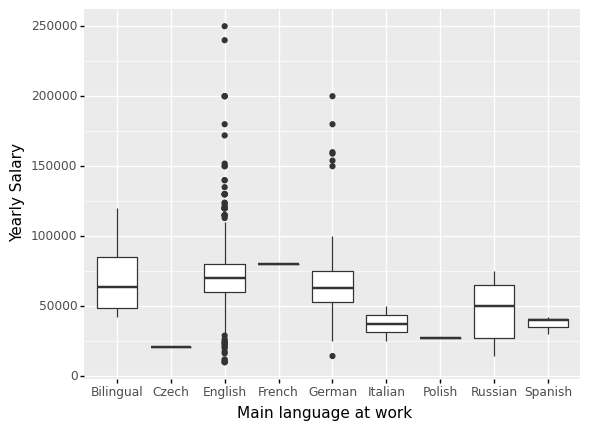

In [139]:
wagebox('Main language at work')

In [142]:
dictionary1['Company size']

,Company size,Mean,Standard Deviation,Sample Size
0,1000+,75729,24378,377
1,101-1000,73730,46855,354
2,11-50,66037,24167,146
3,51-100,65596,18539,127
4,up to 10,9680213,69328371,52


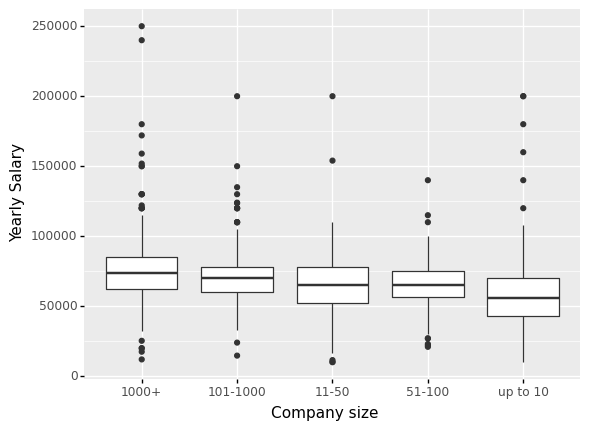

In [144]:
wagebox('Company size')